Shape: (20631, 26)
   unit  cycle  operational_setting_1  operational_setting_2  \
0     1      1                -0.0007                -0.0004   
1     1      2                 0.0019                -0.0003   
2     1      3                -0.0043                 0.0003   
3     1      4                 0.0007                 0.0000   
4     1      5                -0.0019                -0.0002   

   operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0                  100.0    518.67    641.82   1589.70   1400.60     14.62   
1                  100.0    518.67    642.15   1591.82   1403.14     14.62   
2                  100.0    518.67    642.35   1587.99   1404.20     14.62   
3                  100.0    518.67    642.35   1582.79   1401.87     14.62   
4                  100.0    518.67    642.37   1582.85   1406.22     14.62   

   ...  sensor_12  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  \
0  ...     521.66    2388.02    8138.62     8.4195 

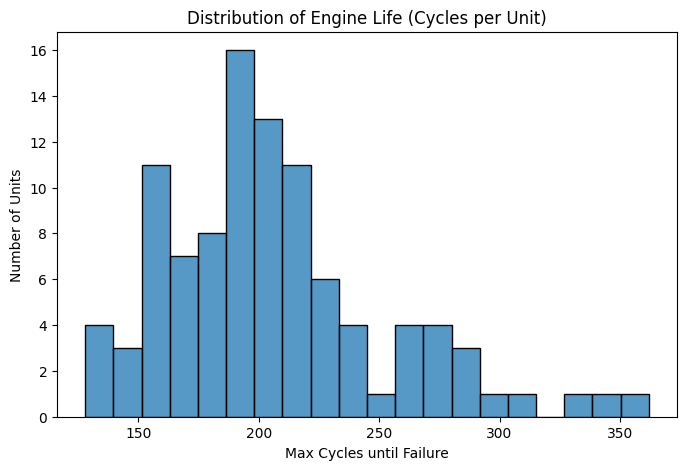

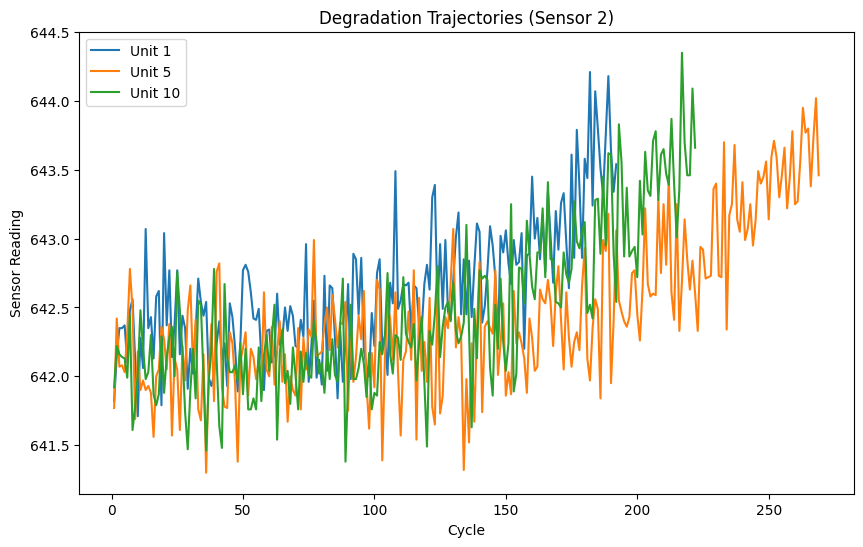

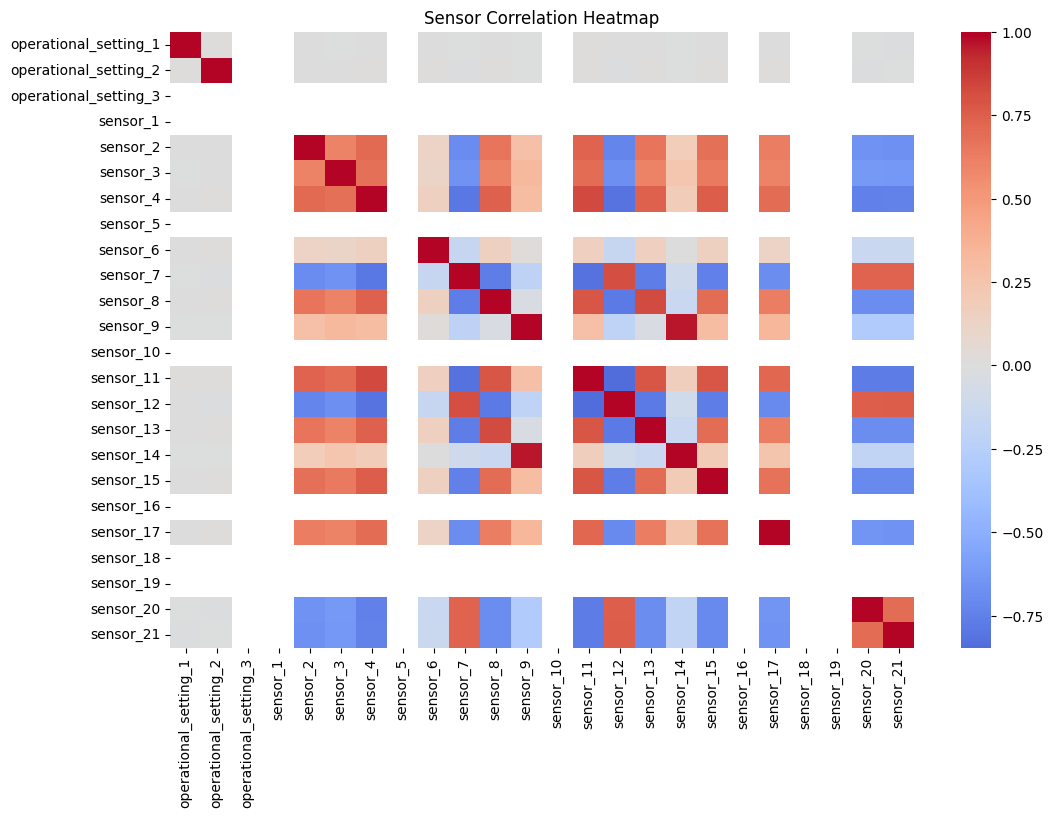

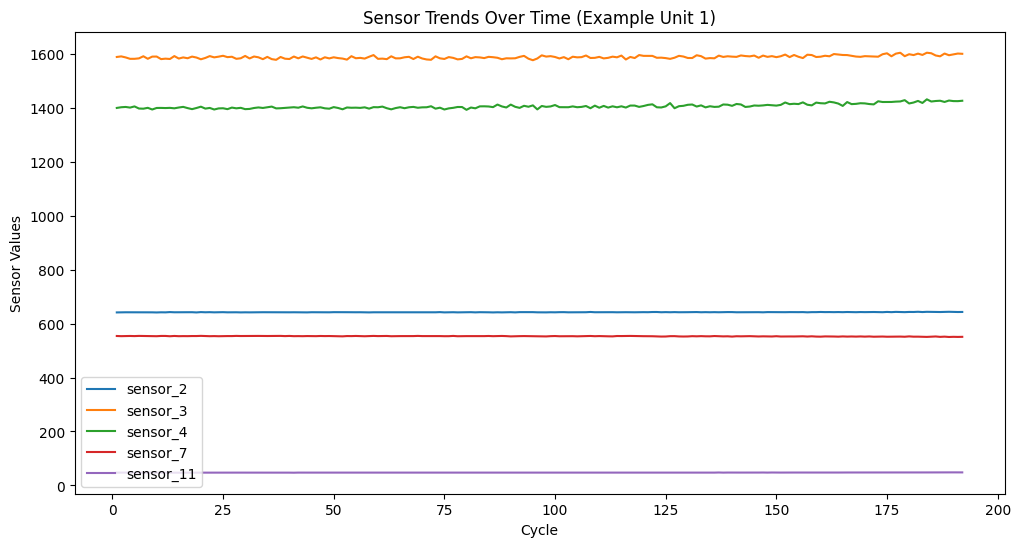

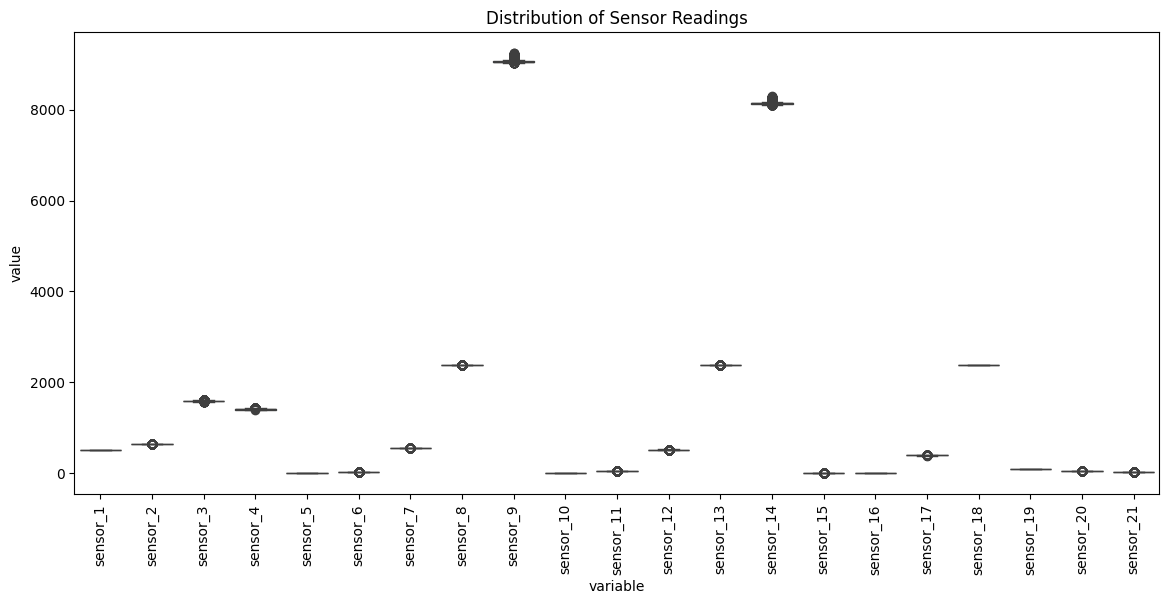

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# File path
file_path = r"..\data\CMaps\train_FD001.txt"

# Column names based on NASA C-MAPSS dataset spec
col_names = [
    "unit", "cycle", "operational_setting_1", "operational_setting_2", "operational_setting_3",
    "sensor_1", "sensor_2", "sensor_3", "sensor_4", "sensor_5",
    "sensor_6", "sensor_7", "sensor_8", "sensor_9", "sensor_10",
    "sensor_11", "sensor_12", "sensor_13", "sensor_14", "sensor_15",
    "sensor_16", "sensor_17", "sensor_18", "sensor_19", "sensor_20", "sensor_21"
]

# Load dataset
df = pd.read_csv(file_path, sep=" ", header=None)
df.dropna(axis=1, how='all', inplace=True)  # remove empty columns
df.columns = col_names

# ---- Basic Info ----
print("Shape:", df.shape)
print(df.head())
print(df.describe())

# ---- EDA Starts ----

# 1. Units and cycle lengths
unit_cycles = df.groupby("unit")["cycle"].max()
plt.figure(figsize=(8, 5))
sns.histplot(unit_cycles, bins=20, kde=False)
plt.title("Distribution of Engine Life (Cycles per Unit)")
plt.xlabel("Max Cycles until Failure")
plt.ylabel("Number of Units")
plt.show()

# 2. Example degradation trajectories (pick some engines)
sample_units = [1, 5, 10]
plt.figure(figsize=(10, 6))
for u in sample_units:
    subset = df[df["unit"] == u]
    plt.plot(subset["cycle"], subset["sensor_2"], label=f"Unit {u}")
plt.title("Degradation Trajectories (Sensor 2)")
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.legend()
plt.show()

# 3. Correlation heatmap (sensors only)
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["unit", "cycle"]).corr(), cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()

# 4. Sensor trends for one engine (multi-sensor plot)
engine_example = df[df["unit"] == 1]
sensors_to_plot = ["sensor_2", "sensor_3", "sensor_4", "sensor_7", "sensor_11"]
plt.figure(figsize=(12, 6))
for s in sensors_to_plot:
    plt.plot(engine_example["cycle"], engine_example[s], label=s)
plt.title("Sensor Trends Over Time (Example Unit 1)")
plt.xlabel("Cycle")
plt.ylabel("Sensor Values")
plt.legend()
plt.show()

# 5. Variability across sensors (boxplot)
plt.figure(figsize=(14, 6))
df_melt = df.melt(id_vars=["unit", "cycle"], value_vars=[f"sensor_{i}" for i in range(1, 22)])
sns.boxplot(data=df_melt, x="variable", y="value")
plt.xticks(rotation=90)
plt.title("Distribution of Sensor Readings")
plt.show()
